**Task 1**
A parallel 140 kVp (140 kV source peak voltage) X-ray passes
through an object (called the “phantom”) consisting of a single material, and the remaining
X-ray intensity is captured by an idealised detector which is able to capture each incoming
photon with perfect energy resolution. The detector consists of only one pixel, and only the
X-rays that incident the pixel orthogonally are accepted (scatter is hence rejected).
The dataset consists of two sets: The registered intensity of the X-ray beam with 33 mm of
water inserted, and with 33 mm of fat inserted. The actual data is a histogram of registered
counts over energy [MeV]

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
path1='dataset/task_1/fat/hist_140.npy'
path2='dataset/task_1/water/hist_140.npy'
histogram_fat=np.load(path1)
histogram_water=np.load(path2)


In [6]:
print(histogram_water[1])
print(type(histogram_fat[0,:]))

[7.00000e+00 3.00000e+01 7.90000e+01 2.22000e+02 4.79000e+02 9.22000e+02
 1.66000e+03 2.70900e+03 4.16200e+03 5.58800e+03 7.68100e+03 9.93300e+03
 1.21810e+04 1.47640e+04 1.75570e+04 2.02170e+04 2.29100e+04 2.54220e+04
 2.79440e+04 3.03990e+04 3.21730e+04 3.42520e+04 3.56950e+04 3.80480e+04
 3.87350e+04 4.02200e+04 4.13910e+04 4.21580e+04 4.29650e+04 4.33310e+04
 4.41990e+04 4.44280e+04 4.45530e+04 4.46460e+04 4.45610e+04 4.49460e+04
 4.47260e+04 4.43870e+04 1.70700e+05 2.67821e+05 4.33000e+04 4.28100e+04
 4.22550e+04 4.18540e+04 4.12260e+04 4.09250e+04 4.03780e+04 1.22424e+05
 3.92930e+04 6.06910e+04 3.49030e+04 3.43100e+04 3.37620e+04 3.31740e+04
 3.29690e+04 3.22280e+04 3.18810e+04 3.14420e+04 3.09210e+04 3.02640e+04
 2.96480e+04 2.91660e+04 2.88240e+04 2.76630e+04 2.74760e+04 2.67660e+04
 2.64250e+04 2.57320e+04 2.52680e+04 2.49940e+04 2.44500e+04 2.35820e+04
 2.36900e+04 2.27930e+04 2.23170e+04 2.17820e+04 2.12020e+04 2.05830e+04
 2.01940e+04 1.98520e+04 1.93440e+04 1.88340e+04 1.

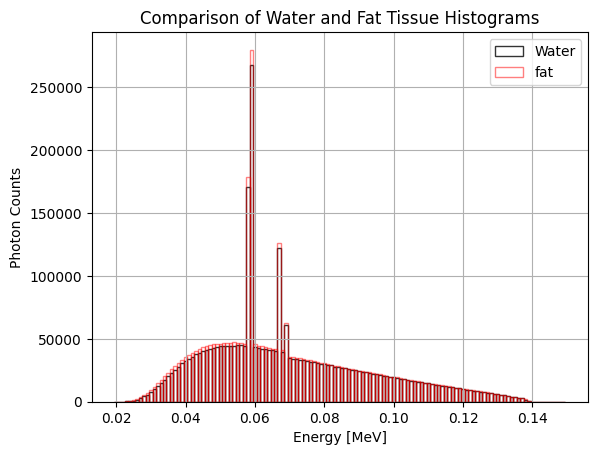

In [7]:
plt.bar(histogram_water[0,:], histogram_water[1,:], width=np.diff(histogram_water[0,:])[0], color='none', edgecolor='black', alpha=0.8, label='Water')
plt.bar(histogram_fat[0,:], histogram_fat[1,:], width=np.diff(histogram_fat[0,:])[0], edgecolor='red', alpha=0.5,color='none', label='fat')
#plt.plot(histogram_fat[0,:],histogram_fat[1,:], marker='.', color='red' )
#plt.plot(histogram_water[0,:], histogram_water[1,:], marker='.', color='black')
plt.title('Comparison of Water and Fat Tissue Histograms')
plt.xlabel('Energy [MeV]')
plt.ylabel('Photon Counts')

plt.legend()
plt.grid(True)
plt.show()

Energy-integrating detector output
a signal that is proportional to the deposited energy.
If the spectrum is given by S(E), then the signal will be
proportional to the integral over the spectrum (number
of photons per energy) times the energy of the photons.

**Calculate contrast between the fat and water tissues for:**
- An energy-integrating detector

In [8]:
IDetector_signal_water= np.sum(histogram_water[0,:]*histogram_water[1,:])
IDetector_signal_fat=np.sum(histogram_fat[0,:]*histogram_fat[1,:])
print(IDetector_signal_water)
print(IDetector_signal_fat)

218106.28000000014
226450.82100000017


In [9]:
average_integrating= (IDetector_signal_water + IDetector_signal_fat)/2
contrast_integrating= (IDetector_signal_fat - IDetector_signal_water)/IDetector_signal_water
print(contrast_integrating)

0.03825905884048832




*   A purely photon counting detector (that is, a detector which can count the number of incident photons, but cannot distinguish their energy)



In [10]:
PCDetector_signal_water=np.sum(histogram_water[1,:])
PCDetector_signal_fat=np.sum(histogram_fat[1,:])
#average_PC=(PCDetector_signal_water + PCDetector_signal_fat)/2
contrast_PC= (PCDetector_signal_fat - PCDetector_signal_water)/PCDetector_signal_water
print(contrast_PC)

0.04624044611309813




*   A photon counting detector with spectral resolution. The photon counting detectors today have a limited amount of energy bins. For this example, assume its lower energy bin ranges from 20 keV to 50 keV, and the higher energy bin from 50 keV to infinity. In order to enable comparison with the first two detector types, the measurements from the two energy bins are added, giving the lower energy bin a weight of 80%, and the higher energy bin a weight of 20%.





In [11]:
low_energy_bin_water= (histogram_water[0,:]>=0.02) & (histogram_water[0,:]<0.05)
high_energy_bin_water= histogram_water[0,:]>=0.05

low_energy_water=histogram_water[1, low_energy_bin_water]
high_energy_water=histogram_water[1, high_energy_bin_water]
S_low_water=np.sum(low_energy_water)
S_high_water=np.sum(high_energy_water)


S_tot_water=0.8*S_low_water+0.2*S_high_water
print(S_tot_water)

983872.2


In [12]:
low_energy_bin_fat= (histogram_fat[0,:]>=0.02) & (histogram_fat[0,:]<0.05)
high_energy_bin_fat= histogram_fat[0,:]>=0.05

low_energy_fat=histogram_fat[1, low_energy_bin_water]
high_energy_fat=histogram_fat[1, high_energy_bin_water]
S_low_fat=np.sum(low_energy_fat)
S_high_fat=np.sum(high_energy_fat)

S_tot_fat=0.8*S_low_fat+0.2*S_high_fat
print(S_tot_fat)


1048287.8


In [13]:
contrast_final=(S_tot_fat-S_tot_water)/S_tot_water

In [14]:
print(contrast_final)

0.06547151144223823


**Task 2** The setup is the same as in Task 1, however, the photon counting detectors now exhibit a
finite response time to incoming events, and hence suffer from pile-up effects which vary
with the fluence rate of the beam.

*Details of the simulation*: The dead time of the photon counting detector is assumed to be 34 ns, the
pulse shape is assumed to be Gaussian with a FWHM of 20 ns, and its triggering threshold is at 20 keV.
The counting model for the pile-up was assumed to be non-paralysable.

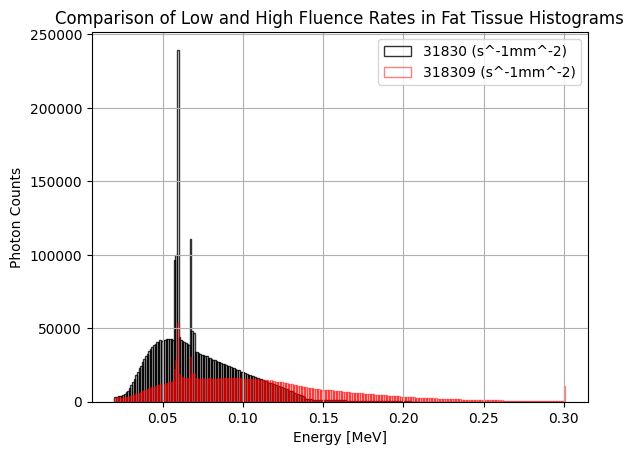

In [29]:
path1='dataset/task_2/fat/rate_5E6.npy'
path2='dataset/task_2/fat/rate_5E7.npy'
histogram_low=np.load(path1)
histogram_high=np.load(path2)

c1=5*10**6
c2=5*10**7
A=np.pi*2*25 #mm^2
f1=int(c1/A) #s^-1mm^-2
f2=int(c2/A) #s^-1mm^-2

plt.bar(histogram_low[0,:], histogram_low[1,:], width=np.diff(histogram_low[0,:])[0], color='none', edgecolor='black', alpha=0.8, label=str(f1)+" (s^-1mm^-2)")
plt.bar(histogram_high[0,:], histogram_high[1,:], width=np.diff(histogram_low[0,:])[0], edgecolor='red', alpha=0.5,color='none', label=str(f2)+" (s^-1mm^-2)")
#plt.plot(histogram_fat[0,:],histogram_fat[1,:], marker='.', color='red' )
#plt.plot(histogram_water[0,:], histogram_water[1,:], marker='.', color='black')
plt.title('Comparison of Low and High Fluence Rates in Fat Tissue Histograms')
plt.xlabel('Energy [MeV]')
plt.ylabel('Photon Counts')

plt.legend()
plt.grid(True)
plt.show()

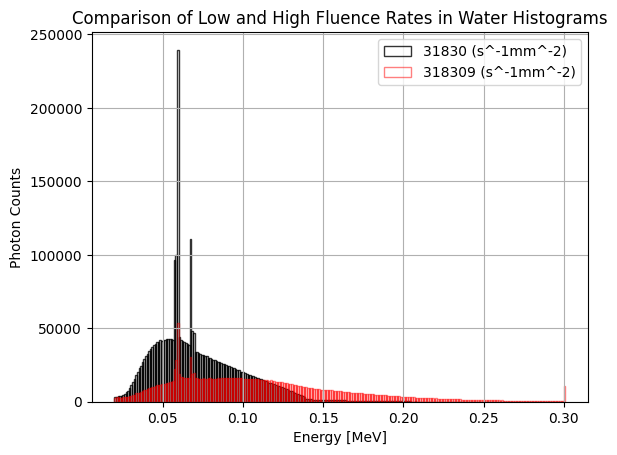

In [31]:
path1w='dataset/task_2/water/rate_5E6.npy'
path2w='dataset/task_2/water/rate_5E7.npy'
whistogram_low=np.load(path1)
whistogram_high=np.load(path2)

c1=5*10**6
c2=5*10**7
A=np.pi*2*25 #mm^2
f1=int(c1/A) #s^-1mm^-2
f2=int(c2/A) #s^-1mm^-2

plt.bar(whistogram_low[0,:], whistogram_low[1,:], width=np.diff(whistogram_low[0,:])[0], color='none', edgecolor='black', alpha=0.8, label=str(f1)+" (s^-1mm^-2)")
plt.bar(whistogram_high[0,:], whistogram_high[1,:], width=np.diff(whistogram_low[0,:])[0], edgecolor='red', alpha=0.5,color='none', label=str(f2)+" (s^-1mm^-2)")
#plt.plot(histogram_fat[0,:],histogram_fat[1,:], marker='.', color='red' )
#plt.plot(histogram_water[0,:], histogram_water[1,:], marker='.', color='black')
plt.title('Comparison of Low and High Fluence Rates in Water Histograms')
plt.xlabel('Energy [MeV]')
plt.ylabel('Photon Counts')

plt.legend()
plt.grid(True)
plt.show()